In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('../data/BrentOilPrices.csv')

# Convert Date to datetime and set as index
# The format handles "20-May-87" style dates
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').set_index('Date')

print(df.head())
print(f"Data range: {df.index.min()} to {df.index.max()}")

C:\Users\Maireg\AppData\Local\Temp\ipykernel_2368\3185883751.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
Data range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


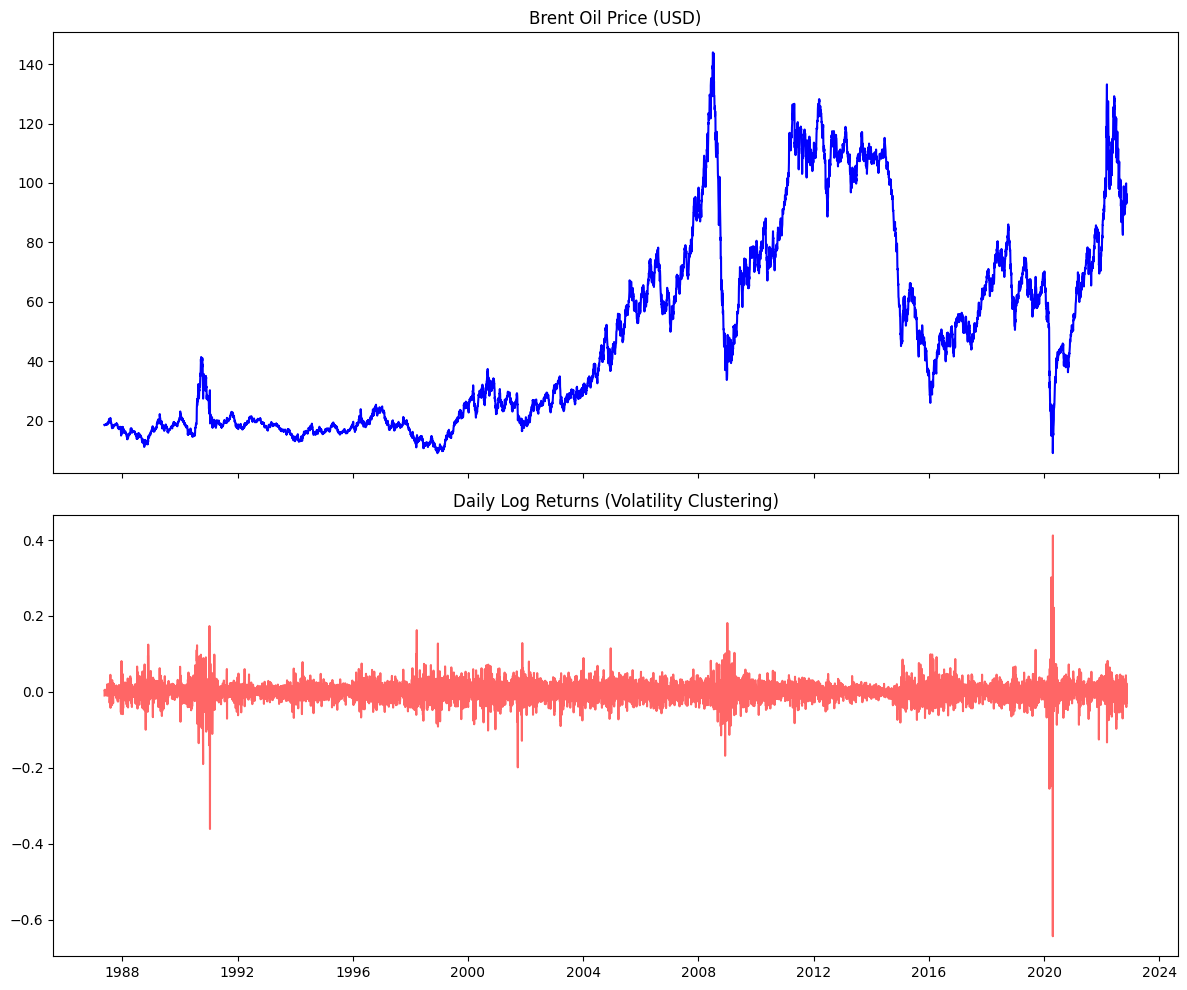

In [4]:
# Calculate Daily Log Returns for stationarity/volatility analysis
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Plot Price and Log Returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax1.plot(df['Price'], color='blue')
ax1.set_title('Brent Oil Price (USD)')
ax2.plot(df['Log_Return'], color='red', alpha=0.6)
ax2.set_title('Daily Log Returns (Volatility Clustering)')
plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

def run_adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"--- ADF Test for {name} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")
    print("-" * 30)

run_adf_test(df['Price'], "Raw Price")
run_adf_test(df['Log_Return'], "Log Returns")

--- ADF Test for Raw Price ---
ADF Statistic: -1.9939
p-value: 0.2893
Non-Stationary
------------------------------
--- ADF Test for Log Returns ---
ADF Statistic: -16.4271
p-value: 0.0000
Stationary
------------------------------


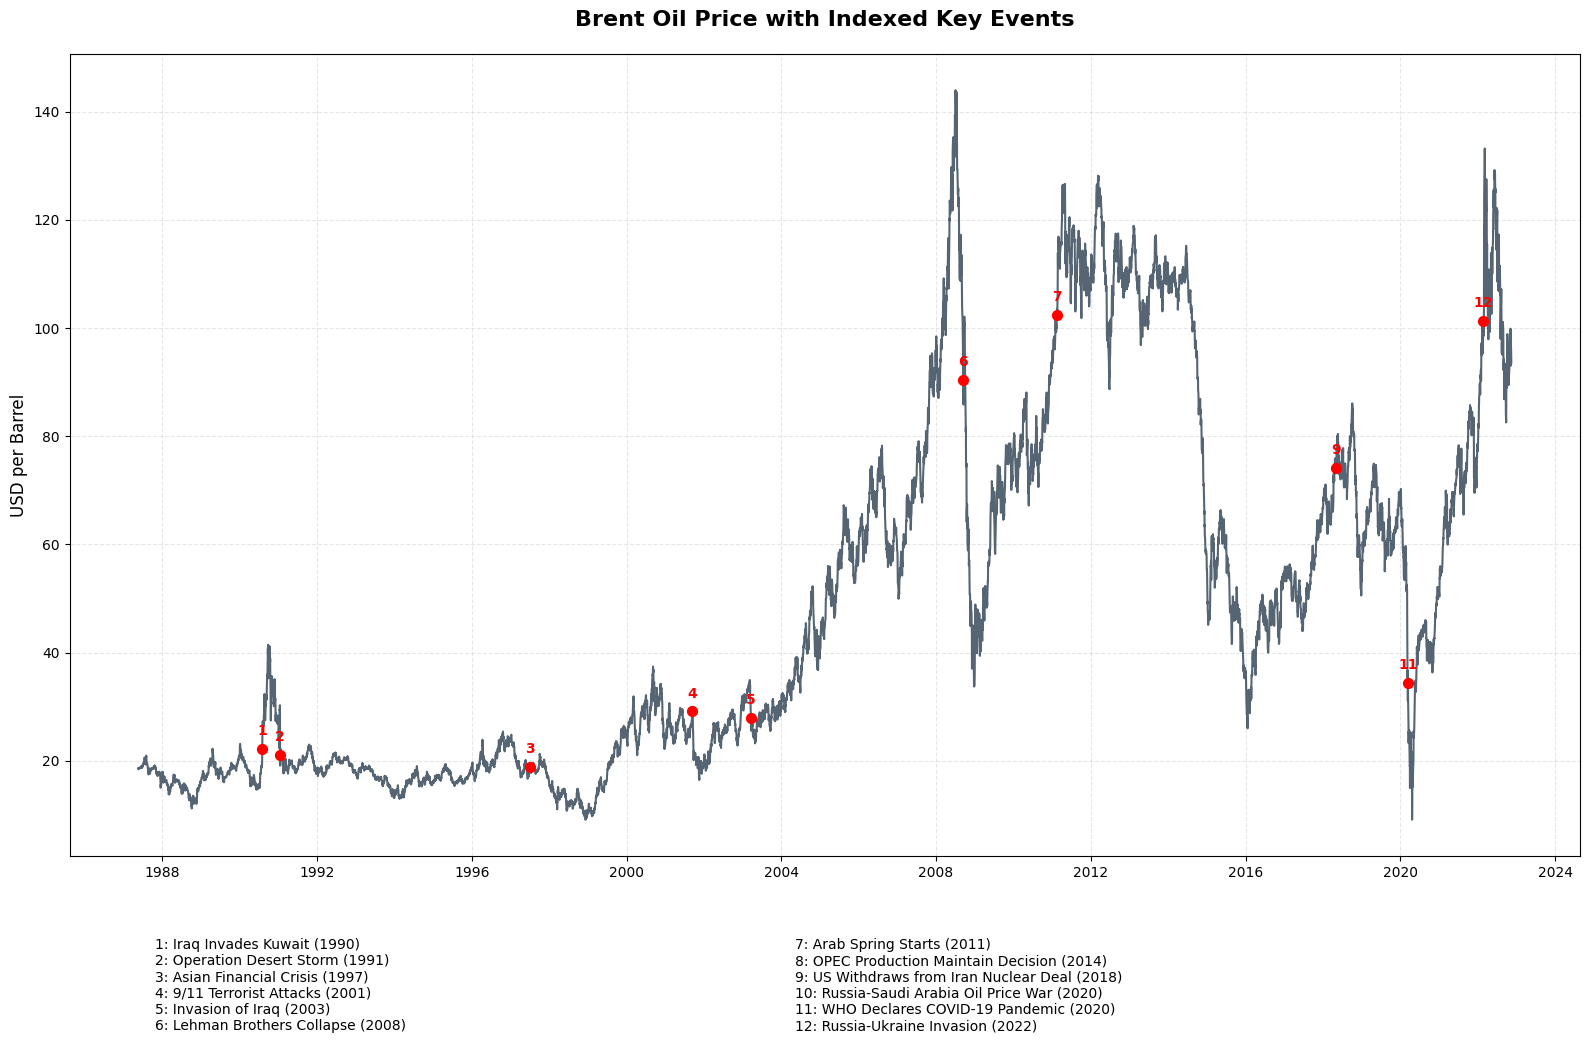

In [9]:
plt.figure(figsize=(16, 9))

# Plot the Price Line
plt.plot(df.index, df['Price'], color='#2c3e50', linewidth=1.5, label='Brent Oil Price', alpha=0.8)

# Define a color palette for event markers
colors = plt.cm.tab20(np.linspace(0, 1, len(events)))

# Plot numbered markers
for i, (_, row) in enumerate(events.iterrows()):
    # Find the price at that date (or the closest available date)
    if row['Date'] in df.index:
        price_at_event = df.loc[row['Date'], 'Price']
        plt.scatter(row['Date'], price_at_event, color='red', s=50, zorder=5)
        plt.annotate(str(i+1), (row['Date'], price_at_event), 
                     textcoords="offset points", xytext=(0,10), 
                     ha='center', fontsize=10, fontweight='bold', color='red')

# Formatting
plt.title('Brent Oil Price with Indexed Key Events', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('USD per Barrel', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Create a clean legend below the plot
event_legend = [f"{i+1}: {row['Event']} ({row['Date'].year})" for i, row in events.iterrows()]
plt.figtext(0.1, -0.15, "\n".join(event_legend[:6]), fontsize=10, ha='left')
plt.figtext(0.5, -0.15, "\n".join(event_legend[6:]), fontsize=10, ha='left')

plt.tight_layout()
plt.show()

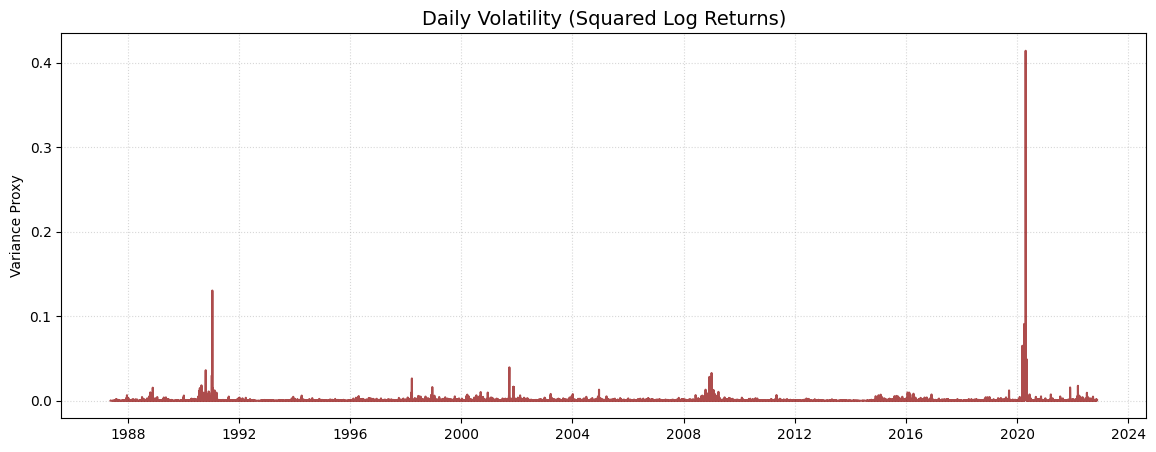

High variance clusters usually correspond to major geopolitical shocks identified in Task 1.


In [10]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Log_Return']**2, color='darkred', alpha=0.7)
plt.title('Daily Volatility (Squared Log Returns)', fontsize=14)
plt.ylabel('Variance Proxy')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

print("High variance clusters usually correspond to major geopolitical shocks identified in Task 1.")

In [12]:
# Save processed data for Task 2
df.to_csv('../data/processed_brent_prices.csv')
print("Processed data saved to data/processed_brent_prices.csv")

Processed data saved to data/processed_brent_prices.csv
